# Generating Data

Goal is to create a multidimensional path representing the robot's movement.
Due to the lack of sensor data, motion information is generated. The following paragraphs describe the data generation task in detail.

## 2-dim sinusoidal movement

General idea: since curves are challenging inputs for tracking tasks, we create a create a "curvy"-like movement on a x-y plane using the sine function.

### Ground truth

Generate the ground truth for robot motion.

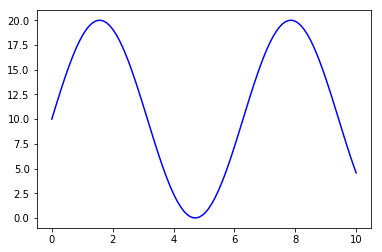

In [21]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np

origin = 0 # coordinate frame origin
samples = 100 # 100 data points
map_length = 10 #[m]
# generate x values representing movement in x-direction
x = np.linspace(origin, map_length, samples)
# generate y values representing movement in y-direction
y = np.sin(x)*map_length
y = [item+map_length for item in y] # shift to contain only positive values

# generate 2-dimensional plot
plt.plot(x, y,'blue')
plt.show()

### Adding noise

Since sensor based observations (percetion) of the environment are never 100% accurate, we simulate the observation uncertainty adding random noise to the ground truth data.

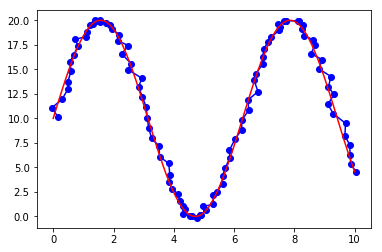

In [23]:
# generate gaussian noise
noise_x = np.random.normal(0, 0.1, samples)
noise_y = np.random.normal(0, 0.1, samples)
# add noise to x and y values
noisy_x = x + noise_x
noisy_y = y + noise_y

# generate 2-dimensional plot
plt.plot(noisy_x, noisy_y, 'blue', marker='o')
plt.plot(x, y, 'red')
plt.show()

### Modeling the perception confidence

Up until now we have the ground truth (representing the robots movement) and the noisy data (representing the perception). In order to generate (meaningful) sensor data, we would also need to create a confidence for each obersevation representing its accuracy. 

In general, the confidence represents a probablilistic value $\in [0,1]$. A very simple approach to derive the confidence from a percieved data point is using the root sqared error ($rse$). We substrtact the $rse$ values from 1 and use the result as the observation confidence.
$confidence_x = 1 - \sqrt{(x_{observed}-x_{groundtruth})^2}$

Although some might disagree with this type of "confidence", we believe it will be acceptable for the filtering tasks.

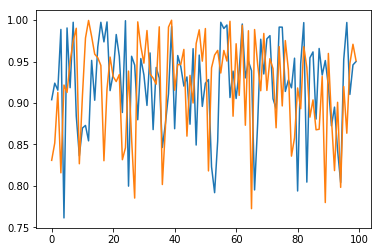

In [24]:
confidence_x = 1-np.sqrt((noise_x)**2)
confidence_y = 1-np.sqrt((noise_y)**2)

plt.plot(confidence_y)
plt.plot(confidence_x)

### Export to CSV

In [27]:
np.savetxt('sensor_data.csv', zip(x, noisy_x, confidence_x, y, noisy_y, confidence_y), delimiter=',', fmt='%f', header="ground_truth_x, sensor_1_x, confidence_x, ground_truth_y, sensor_1_y, confidence_y")